In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import SimpleRNN, Dense, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Assignment 3 Soft Computing/Dataset 1.csv', encoding = "ISO-8859-1", engine='python')

In [ ]:
dataset

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
dataset=dataset.dropna()

In [ ]:
dataset_message = dataset.drop('label',axis=1)

In [ ]:
dataset_label=dataset['label']

In [ ]:
dataset_message.shape , dataset_label.shape

((10314, 1), (10314,))

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Text Preprocessing**

In [ ]:
lengthfind = []
textCorpus = []
lemmatizer = WordNetLemmatizer()
for i in range(len(dataset_message)):
    print(i)
    text = re.sub('[^a-zA-Z]', ' ', dataset_message['message'][i])
    text = text.lower()
    text = word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
    lengthfind.append(len(text))
    text = ' '.join(text)
    textCorpus.append(text)

Streaming output truncated to the last 5000 lines.
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503

In [ ]:
textCorpus

['real good moment miss much',
 'reading manga http plurk com p mzp e',
 'comeagainjen http twitpic com lx http www youtube com watch v zogfqvh',
 'lapcat need send em accountant tomorrow oddly even referring tax supporting evidence though',
 'add myspace myspace com lookthunder',
 'sleepy good time tonight though',
 'silkcharm nbn someone already said fiber home mean least regular',
 'c possible today nice',
 'nite twitterville workout ciao',
 'dananner night darlin sweet dream',
 'good morning everybody',
 'finally created wordpress blog already blog seattle coffee community http tinyurl com c uufd',
 'kisha cnt get u til get frm u remember ur top',
 'nicolerichie yes remember band awesome please reply',
 'really love reflection shadow',
 'blueaero ooo fantasy like fantasy novel check',
 'rokchic probs sell nothing blog http snedwan com get listen band itunes',
 'shipovalov quot nokla connecting people quot',
 'stayed late start early good thing like job',
 'kal penn read new job con

In [ ]:
maxLength = max(lengthfind)
print(maxLength)


75


# **Hyperparameter List**

In [ ]:
wordDictionary = 20000
maxSentenceLength = maxLength
embeddingLayerFeatureNumber=50
learningRate = 0.001
epoch = 20
batch = 100

# **One Hot Representation**

In [ ]:
onehotRepresentation=[one_hot(w,wordDictionary)for w in textCorpus] 


In [ ]:
onehotRepresentation

[[7325, 15269, 19365, 15596, 6897],
 [9303, 11545, 6037, 13331, 14505, 12014, 9872, 6882],
 [3179, 6037, 13202, 14505, 279, 6037, 10629, 9853, 14505, 19712, 131, 13540],
 [11911,
  19804,
  13660,
  9353,
  3816,
  19283,
  1907,
  1744,
  14770,
  18717,
  231,
  5158,
  6501],
 [4229, 14326, 14326, 14505, 11962],
 [13095, 15269, 9150, 10178, 6501],
 [12298, 17329, 10673, 4468, 19232, 14737, 13705, 14511, 12769, 5743],
 [6641, 8333, 397, 16807],
 [19264, 13467, 5905, 9861],
 [2060, 18561, 17608, 8368, 18717],
 [15269, 7764, 8419],
 [9614,
  4047,
  8287,
  16710,
  4468,
  16710,
  15747,
  6999,
  242,
  6037,
  18015,
  14505,
  6641,
  8658],
 [18282, 17901, 13557, 13064, 1558, 13557, 19206, 13064, 3902, 9608, 16125],
 [18896, 1300, 3902, 10752, 16594, 2919, 7110],
 [3307, 3880, 9086, 17666],
 [12047, 7552, 3387, 4756, 3387, 2293, 4504],
 [6320,
  741,
  17315,
  16060,
  16710,
  6037,
  14246,
  14505,
  13557,
  1731,
  10752,
  1424],
 [2960, 5173, 5287, 17101, 5960, 5173],
 [1

# **Padding Sentence**

In [ ]:
paddingTextCorpus=pad_sequences(onehotRepresentation,padding='pre',maxlen=maxSentenceLength)


In [ ]:
paddingTextCorpus

array([[    0,     0,     0, ..., 19365, 15596,  6897],
       [    0,     0,     0, ..., 12014,  9872,  6882],
       [    0,     0,     0, ..., 19712,   131, 13540],
       ...,
       [    0,     0,     0, ...,  6037, 16488,  7061],
       [    0,     0,     0, ..., 12574, 11934,  9353],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=int32)

In [ ]:
paddingTextCorpus[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,  7325, 15269,
       19365, 15596,  6897], dtype=int32)

# **Data preparation for training , testing , validation**

In [ ]:
messageArray = np.array(paddingTextCorpus)
labelArray = np.array(dataset_label)

In [ ]:
messageArray.shape , labelArray.shape

((10314, 75), (10314,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(messageArray,labelArray, test_size=0.20, random_state=20)

In [ ]:
len(X_train),len(X_test),len(Y_train),len(Y_test)

(8251, 2063, 8251, 2063)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.20, random_state=20)

In [ ]:
len(X_train),len(X_valid),len(Y_train),len(Y_valid)

(6600, 1651, 6600, 1651)

In [ ]:
X_train = tf.convert_to_tensor(X_train, np.int32)
Y_train = tf.convert_to_tensor(Y_train, np.int32)
X_valid = tf.convert_to_tensor(X_valid, np.int32)
Y_valid = tf.convert_to_tensor(Y_valid, np.int32)
X_test = tf.convert_to_tensor(X_test, np.int32)

len(X_train),type(X_train),len(X_test),type(X_test),len(X_valid),type(X_valid)

(6600,
 tensorflow.python.framework.ops.EagerTensor,
 2063,
 tensorflow.python.framework.ops.EagerTensor,
 1651,
 tensorflow.python.framework.ops.EagerTensor)

In [ ]:
X_train[0]

<tf.Tensor: shape=(75,), dtype=int32, numpy=
array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0, 12866,  4450, 15596,  1586,  6263, 16189,  2760,  3371,
       15382,  4441, 17323], dtype=int32)>

# **RNN Model**

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(wordDictionary +1,embeddingLayerFeatureNumber, input_length=maxSentenceLength,
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(SimpleRNN(35, input_shape = (wordDictionary,maxSentenceLength), return_sequences= True, activation= "tanh"))

model.add(SimpleRNN(25, input_shape = (wordDictionary,maxSentenceLength), return_sequences= True, activation= "tanh"))

model.add(SimpleRNN(20, input_shape = (wordDictionary,maxSentenceLength), return_sequences= True, activation= "tanh"))

model.add(SimpleRNN(15, input_shape = (wordDictionary,maxSentenceLength), return_sequences= True, activation= "tanh"))


model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',
                                kernel_regularizer=regularizers.l2(0.001),
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(100, activation='relu',
                                kernel_regularizer=regularizers.l2(0.001),
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=learningRate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')

model.summary()
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 75, 50)            1000050   
_________________________________________________________________
dropout (Dropout)            (None, 75, 50)            0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 75, 35)            3010      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 75, 25)            1525      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 75, 20)            920       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 75, 15)            540       
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 15)            0

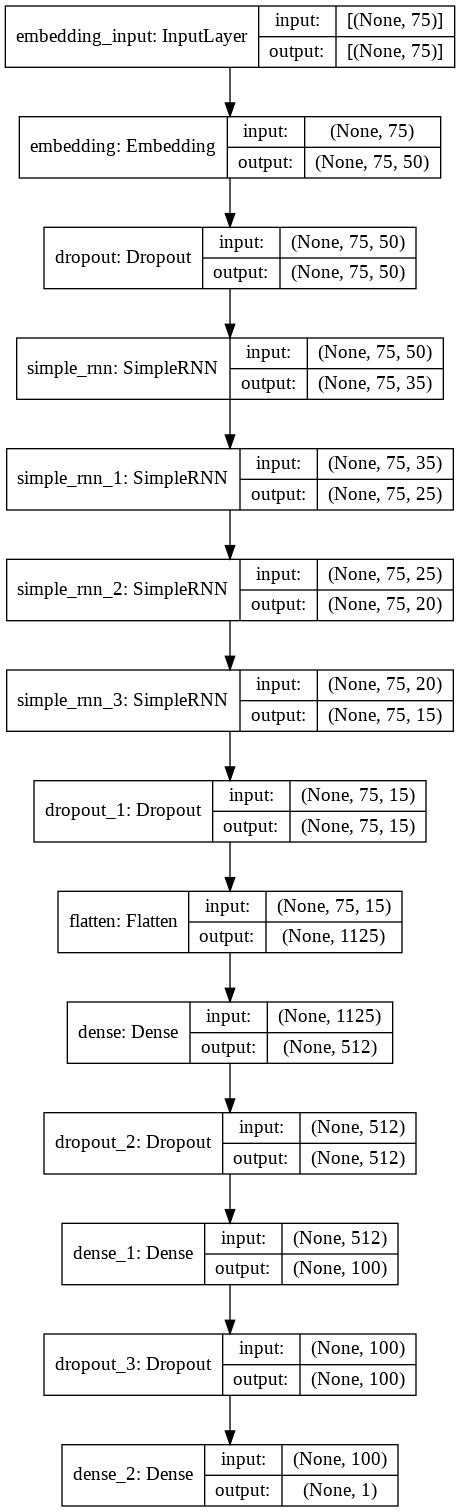

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
modelSummary = model.fit(X_train,Y_train,validation_data=(X_valid,Y_valid),epochs=epoch,batch_size=batch)

Epoch 1/20
66/66 [==============================] - 27s 321ms/step - loss: 2.3005 - accuracy: 0.7618 - val_loss: 1.2573 - val_accuracy: 0.7735
Epoch 2/20
66/66 [==============================] - 21s 315ms/step - loss: 1.0198 - accuracy: 0.8367 - val_loss: 0.7092 - val_accuracy: 0.9376
Epoch 3/20
66/66 [==============================] - 21s 321ms/step - loss: 0.5545 - accuracy: 0.9708 - val_loss: 0.4276 - val_accuracy: 0.9836
Epoch 4/20
66/66 [==============================] - 21s 314ms/step - loss: 0.3555 - accuracy: 0.9956 - val_loss: 0.2851 - val_accuracy: 0.9982
Epoch 5/20
66/66 [==============================] - 21s 315ms/step - loss: 0.2466 - accuracy: 0.9974 - val_loss: 0.2039 - val_accuracy: 0.9982
Epoch 6/20
66/66 [==============================] - 21s 316ms/step - loss: 0.1757 - accuracy: 0.9982 - val_loss: 0.1516 - val_accuracy: 0.9982
Epoch 7/20
66/66 [==============================] - 21s 314ms/step - loss: 0.1418 - accuracy: 0.9964 - val_loss: 0.1213 - val_accuracy: 0.9976

In [ ]:
modelSummary.history

{'accuracy': [0.7618181705474854,
  0.8366666436195374,
  0.9707576036453247,
  0.9956060647964478,
  0.9974242448806763,
  0.9981818199157715,
  0.996363639831543,
  0.9971212148666382,
  0.9975757598876953,
  0.9948484897613525,
  0.9984848499298096,
  0.9980303049087524,
  0.996515154838562,
  0.9980303049087524,
  0.9980303049087524,
  0.9971212148666382,
  0.9959090948104858,
  0.996363639831543,
  0.9986363649368286,
  0.9984848499298096],
 'loss': [2.300457715988159,
  1.0198153257369995,
  0.5545379519462585,
  0.3555245101451874,
  0.24655963480472565,
  0.175663560628891,
  0.14178501069545746,
  0.11867357045412064,
  0.09845251590013504,
  0.10179268568754196,
  0.08508631587028503,
  0.06370750069618225,
  0.06311417371034622,
  0.0603942796587944,
  0.051160138100385666,
  0.04677056893706322,
  0.062438201159238815,
  0.07366779446601868,
  0.05088479816913605,
  0.04578246921300888],
 'val_accuracy': [0.7734706401824951,
  0.9376135468482971,
  0.9836462736129761,
  0.9

# **Loss Curve**

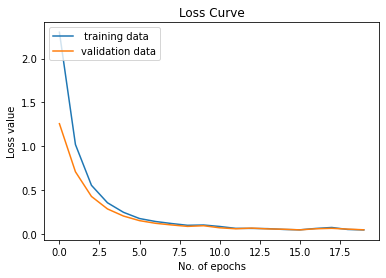

In [ ]:
plt.plot(modelSummary.history['loss'], label=' training data')
plt.plot(modelSummary.history['val_loss'], label='validation data')
plt.title('Loss Curve')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper left")
plt.show()

# **Testing Data**

In [ ]:
Y_predict = (model.predict(X_test) > 0.5).astype("int32")

# **Confusion Matrix**

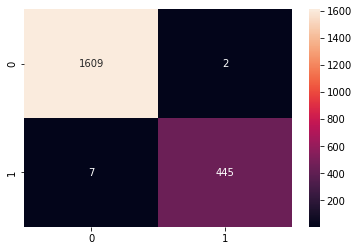

In [ ]:
conf = confusion_matrix(Y_test,Y_predict)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

# **Accuracy**

In [ ]:
accuracy_score(Y_test,Y_predict)

0.9956374212312167

# **Classification Report**

In [ ]:
target = ['0','1']
print(classification_report(Y_test,Y_predict, target_names=target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1611
           1       1.00      0.98      0.99       452

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063



In [ ]:
model.save("/content/drive/MyDrive/Assignment 3 Soft Computing/Final/RNNModel")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Assignment 3 Soft Computing/Final/RNNModel/assets
